In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [66]:
#import data

train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [67]:
#look at data to see what we are working with
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#look at data to see what we are working with 
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#make sure that there are no null entries in the data
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [70]:
#make sure that there are no null entries in the data
train.isnull().sum().sum()

#makes sense since this is a kaggle dataset

0

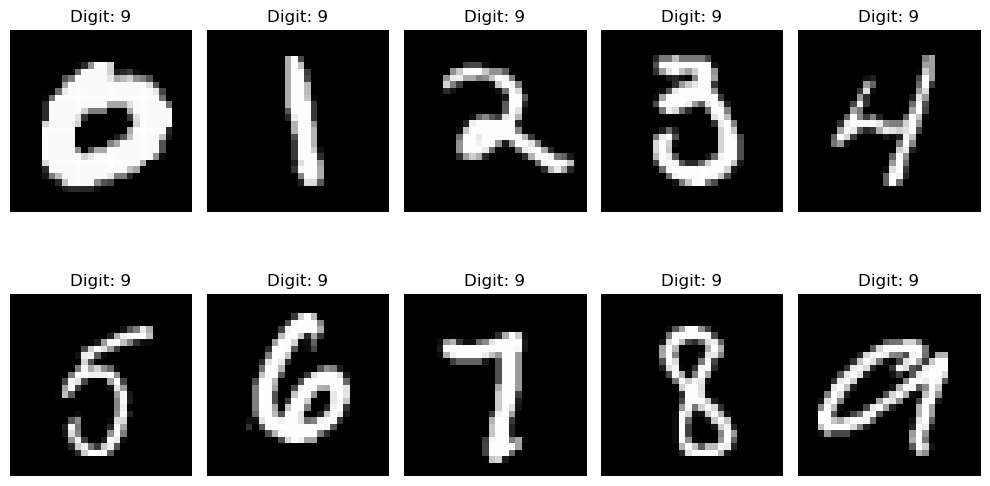

In [71]:
#visualize the data

plt.figure(figsize=(10, 6))
for num in range(10):
    digit_data = train[train['label'] == num].drop(columns=['label']).values
    random_num = digit_data[np.random.randint(0, digit_data.shape[0])]
    plt.subplot(2, 5, num + 1)
    plt.imshow(random_num.reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {num}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [72]:
#train test split

X, y = train.drop(columns = ['label']), train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
#Use Priciple Compenent Analysis on the validationa and training data to reduce the
#amount of dimensionality

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
pca_xtrain = pca.transform(X_train)
pca_xtest = pca.transform(X_test)

In [74]:
#Use Support Vector Machine model 

svc = SVC(random_state = 0)
svc.fit(pca_xtrain,y_train)

SVC(random_state=0)

In [75]:
#make predictions and calculate the accuracy

pred = svc.predict(pca_xtest)
print(f'Accuracy Score: {accuracy_score(y_test,pred)}')

Accuracy Score: 0.9792380952380952


In [86]:
# Apply PCA to original test data
pca_Xtest = pca.transform(test)

# Make predictions on this set
test_pred = svc.predict(pca_Xtest)

In [90]:
#submit scores in a nice file

sub = pd.DataFrame({"ImageId": range(1, len(pca_Xtest) + 1), "Label": test_pred})
sub.to_csv('submission.csv', index = False)
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
